In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import signal
from scipy import stats
from scipy.stats import linregress
import matplotlib as mpl
from statsmodels.api import tsa
import xarray as xr

mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['figure.dpi']= 150
mpl.rcParams['font.size'] = 12

### Read in the relevant data

In [2]:
# read in the timeseries dataframe
timeseries_df = pd.read_csv('data/ts.csv').drop('Unnamed: 0', axis=1)

# the columns of the dataframe are the model names
model_names = timeseries_df.columns[1:]

# the ecs values 
ecs_values = pd.read_csv('data/ecs.csv')

# years
years = timeseries_df['year']

# Figure 1

In [3]:
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple

class HandlerTupleVertical(HandlerTuple):
    def __init__(self, **kwargs):
        HandlerTuple.__init__(self, **kwargs)

    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        # How many lines are there.
        numlines = len(orig_handle)
        handler_map = legend.get_legend_handler_map()

        # divide the vertical space where the lines will go
        # into equal parts based on the number of lines
        height_y = (height / numlines)

        leglines = []
        for i, handle in enumerate(orig_handle):
            handler = legend.get_legend_handler(handler_map, handle)

            legline = handler.create_artists(legend, handle,
                                             xdescent,
                                             (2*i + 1)*height_y,
                                             width,
                                             2*height,
                                             fontsize, trans)
            leglines.extend(legline)

        return leglines

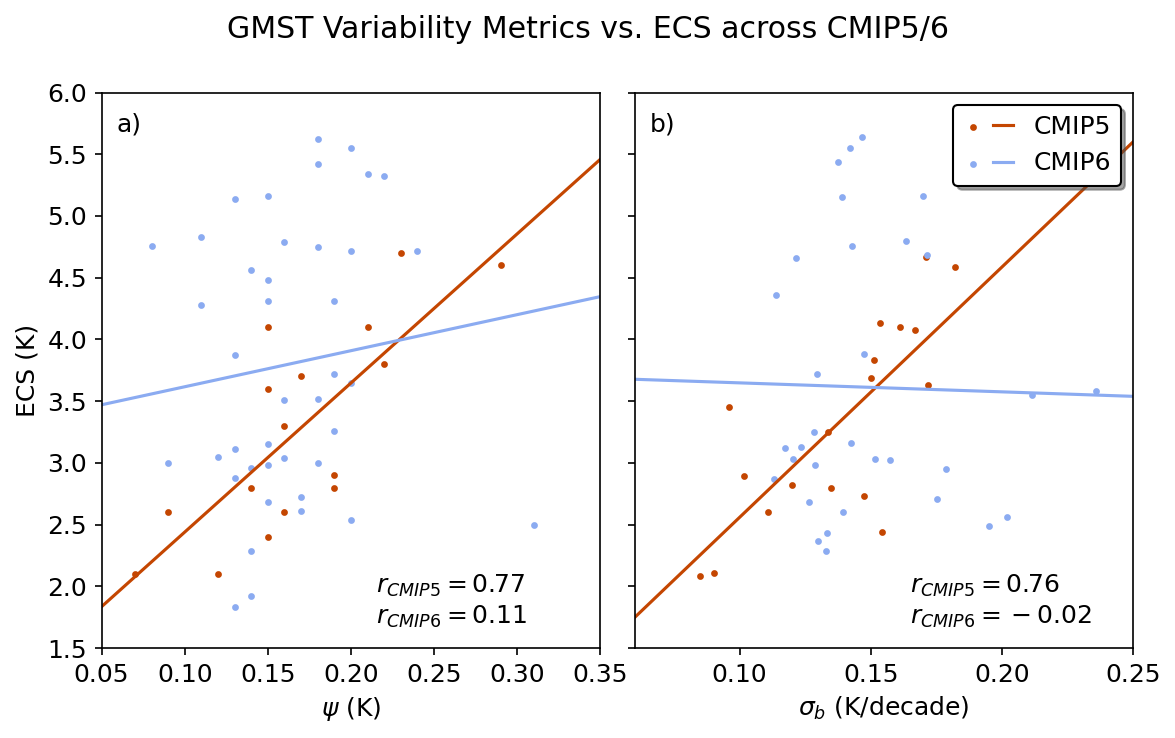

In [331]:
cmip5_color = '#C44601'
cmip6_color = '#8BABF1'
marker_size = 5

cmip5_psi = pd.read_csv('data/data_fig1a_cmip5.csv')
cmip6_psi = pd.read_csv('data/data_fig1a_cmip6.csv')
cmip5_sigma = pd.read_csv('data/data_fig1b_cmip5.csv')
cmip6_sigma = pd.read_csv('data/data_fig1b_cmip6.csv')

fig, axs = plt.subplots(1, 2, figsize = (8, 5), sharey=True)

# plot the actual data
plot_1 = axs[0].scatter(cmip5_psi['Psi'], cmip5_psi['ECS'], color = cmip5_color, s = marker_size)
plot_2 = axs[0].scatter(cmip6_psi['Psi'], cmip6_psi['ECS'], color = cmip6_color, s = marker_size)
plot_3 = axs[1].scatter(cmip5_sigma['Sigma'], cmip5_sigma['ECS'], color = cmip5_color, s = marker_size)
plot_4 = axs[1].scatter(cmip6_sigma['Sigma'], cmip6_sigma['ECS'], color = cmip6_color, s = marker_size)

# linear regression
slope, intercept, r, p, se = linregress(cmip5_psi['Psi'], cmip5_psi['ECS'])
x = np.linspace(0, 1, 100)
trend_1, = axs[0].plot(x, slope*x+intercept, color = cmip5_color)

slope, intercept, r, p, se = linregress(cmip6_psi['Psi'], cmip6_psi['ECS'])
x = np.linspace(0, 1, 100)
trend_2, = axs[0].plot(x, slope*x+intercept, color = cmip6_color)

slope, intercept, r, p, se = linregress(cmip5_sigma['Sigma'], cmip5_sigma['ECS'])
x = np.linspace(0, 1, 100)
trend_3, = axs[1].plot(x, slope*x+intercept, color = cmip5_color)

slope, intercept, r, p, se = linregress(cmip6_sigma['Sigma'], cmip6_sigma['ECS'])
x = np.linspace(0, 1, 100)
trend_4, = axs[1].plot(x, slope*x+intercept, color = cmip6_color)

fig.suptitle('GMST Variability Metrics vs. ECS across CMIP5/6')
axs[0].set_ylabel('ECS (K)')
axs[0].set_xlabel(r'$\psi$ (K)')
axs[1].set_xlabel(r'$\sigma_{b}$ (K/decade)')
axs[0].set_xlim((0.05,0.35))
axs[0].set_ylim((1.5,6))
axs[1].set_ylim((1.5,6))
axs[1].set_xlim((0.06,0.25))
axs[1].legend([(plot_1, trend_1), (plot_2, trend_2)], ['CMIP5', 'CMIP6'], handler_map = {tuple : HandlerTuple(None)}, framealpha=1, edgecolor='black', loc = 'upper right', shadow=True)

axs[0].text(0.215, 1.7, r'$r_{CMIP5}=0.77$'+'\n'+r'$r_{CMIP6}=0.11$')
axs[1].text(0.165, 1.7, r'$r_{CMIP5}=0.76$'+'\n'+r'$r_{CMIP6}=-0.02$')

axs[0].annotate(xy=(0.03,0.93), text='a)', xycoords='axes fraction')
axs[1].annotate(xy=(0.03,0.93), text='b)', xycoords='axes fraction')


# # Move left and bottom spines outward by 10 points
# axs[0].spines.left.set_position(('outward', 10))
# axs[0].spines.bottom.set_position(('outward', 10))
# # Hide the right and top spines
# axs[0].spines.right.set_visible(False)
# axs[0].spines.top.set_visible(False)
# # Only show ticks on the left and bottom spines
# axs[0].yaxis.set_ticks_position('left')
# axs[0].xaxis.set_ticks_position('bottom')

# # Move left and bottom spines outward by 10 points
# axs[1].spines.left.set_position(('outward', 10))
# axs[1].spines.bottom.set_position(('outward', 10))
# # Hide the right and top spines
# axs[1].spines.right.set_visible(False)
# axs[1].spines.top.set_visible(False)
# # Only show ticks on the left and bottom spines
# axs[1].yaxis.set_ticks_position('left')
# axs[1].xaxis.set_ticks_position('bottom')

plt.tight_layout()
plt.savefig('figures/figure_1.png', dpi=3000, facecolor='w')

# Figure 2

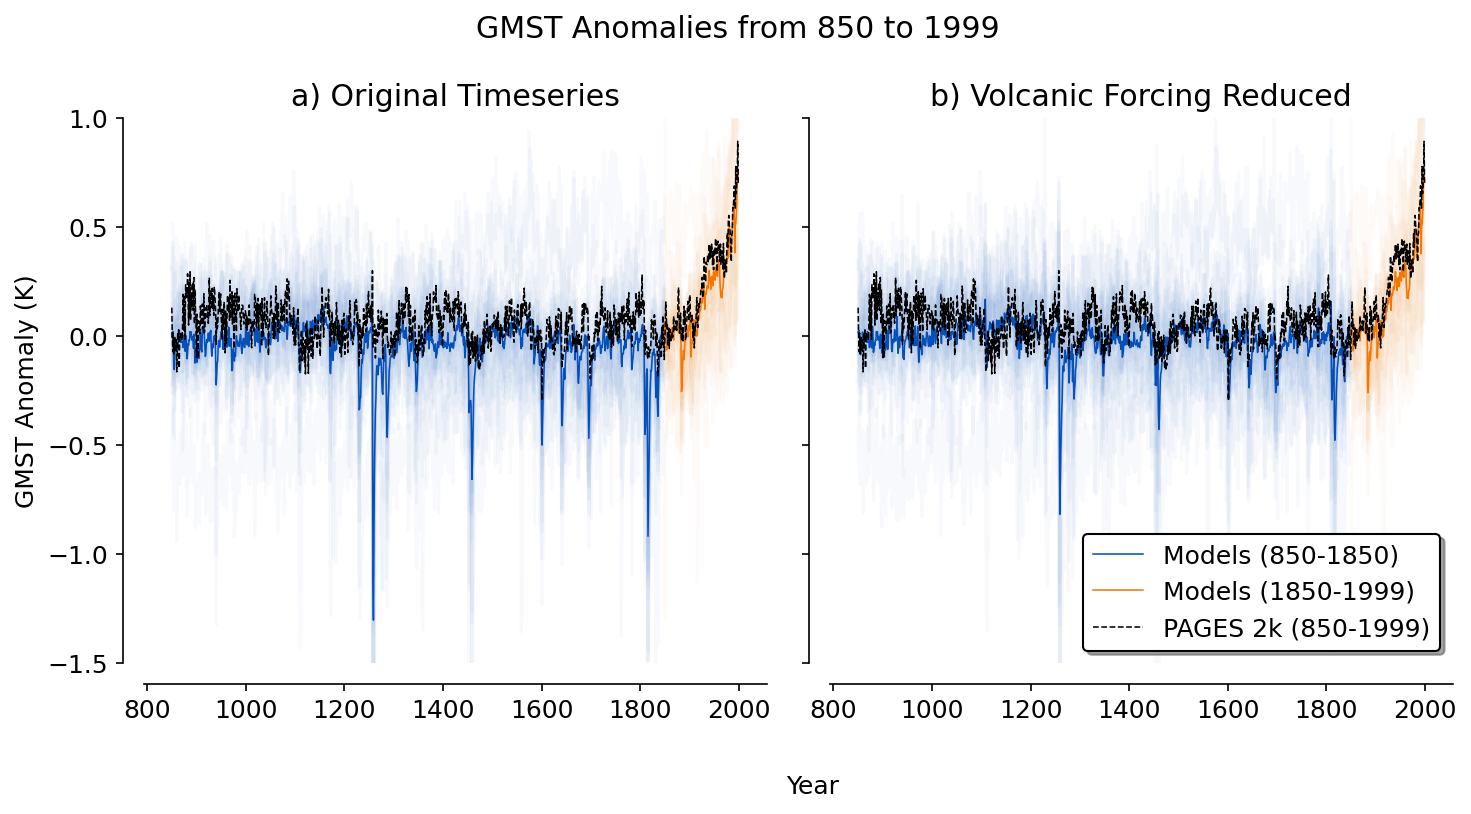

In [38]:
# read in the timeseries dataframe
timeseries_df = pd.read_csv('data/ts.csv').drop('Unnamed: 0', axis=1)

# the columns of the dataframe are the model names
model_names = timeseries_df.columns[1:]

# the ecs values 
ecs_values = pd.read_csv('data/ecs.csv')

# years
years = timeseries_df['year']

def anomaly_ts(model):
    '''
    function: takes the GMST timeseries and computes the anomaly relative to the 1850-1870 climatology
    inputs: model, the model name, str
    outputs: the GMST anomaly timeseries in units K, List[float]
    '''
    # get the model-specific GMST timseries
    ts = timeseries_df[model]
    # compute the reference temperature from the 1850-1870 climatology
    ref = np.mean(ts[990:1010])
    # return the anomaly
    return ts - ref

historical_color = '#F57600'
past1000_color = '#054FB9'

fig, ax = plt.subplots(1, 2, figsize = (10, 5))
ax[0].set_ylim((-1.5, 1))

# plot the temperature anomalies for each model
for model in model_names:
    ax[0].plot(years[:1000], anomaly_ts(model)[:1000], color = past1000_color, alpha = 0.03)
    ax[0].plot(years[1000:], anomaly_ts(model)[1000:], color = historical_color, alpha = 0.03)

# plot the multi-model mean temperature anomaly
model_mean = timeseries_df[model_names].mean(axis=1)
model_mean_ref = np.mean(model_mean[990:1010])
ax[0].plot(years[:1000], (model_mean - model_mean_ref)[:1000], color = past1000_color, linewidth = 0.75, label = 'Models (850-1850)')
ax[0].plot(years[1000:], (model_mean - model_mean_ref)[1000:], color = historical_color, linewidth = 0.75, label = 'Models (1850-2000)')

# now, do the same with the PCR reconstruction from PAGES 2k
pcr_data = pd.read_csv('data/pages_2k/PCR.txt', delimiter = '\t')[849:-1]
ensemble_names = pcr_data.keys()[1:]
pcr_mean = pcr_data[ensemble_names].mean(axis=1)
pcr_ref = np.mean(pcr_mean[990:1010])
ax[0].plot(years, pcr_mean - pcr_ref, color = 'black', linestyle = '--', linewidth = 0.75, label = 'PAGES 2k (850-2000)')

ax[0].set_ylabel('GMST Anomaly (K)')

# Move left and bottom spines outward by 10 points
ax[0].spines.left.set_position(('outward', 10))
ax[0].spines.bottom.set_position(('outward', 10))
# Hide the right and top spines
ax[0].spines.right.set_visible(False)
ax[0].spines.top.set_visible(False)
# Only show ticks on the left and bottom spines
ax[0].yaxis.set_ticks_position('left')
ax[0].xaxis.set_ticks_position('bottom')

# read in the timeseries dataframe
timeseries_df = pd.read_csv('data/ts.csv').drop('Unnamed: 0', axis=1)

# the columns of the dataframe are the model names
model_names = timeseries_df.columns[1:]

# the ecs values 
ecs_values = pd.read_csv('data/ecs.csv')

# years
years = timeseries_df['year']

timeseries_df = pd.read_csv('data/ts_rv.csv').drop('Unnamed: 0', axis=1)

historical_color = '#F57600'
past1000_color = '#054FB9'

ax[1].set_ylim((-1.5, 1))

# plot the temperature anomalies for each model
for model in model_names:
    ax[1].plot(years[:1000], anomaly_ts(model)[:1000], color = past1000_color, alpha = 0.03)
    ax[1].plot(years[1000:], anomaly_ts(model)[1000:], color = historical_color, alpha = 0.03)

# plot the multi-model mean temperature anomaly
model_mean = timeseries_df[model_names].mean(axis=1)
model_mean_ref = np.mean(model_mean[990:1010])
ax[1].plot(years[:1000], (model_mean - model_mean_ref)[:1000], color = past1000_color, linewidth = 0.75, label = 'Models (850-1850)')
ax[1].plot(years[1000:], (model_mean - model_mean_ref)[1000:], color = historical_color, linewidth = 0.75, label = 'Models (1850-1999)')

# now, do the same with the PCR reconstruction from PAGES 2k
pcr_data = pd.read_csv('data/pages_2k/PCR.txt', delimiter = '\t')[849:-1]
ensemble_names = pcr_data.keys()[1:]
pcr_mean = pcr_data[ensemble_names].mean(axis=1)
pcr_ref = np.mean(pcr_mean[990:1010])
ax[1].plot(years, pcr_mean - pcr_ref, color = 'black', linestyle = '--', linewidth = 0.75, label = 'PAGES 2k (850-1999)')

# Move left and bottom spines outward by 10 points
ax[1].spines.left.set_position(('outward', 10))
ax[1].spines.bottom.set_position(('outward', 10))
# Hide the right and top spines
ax[1].spines.right.set_visible(False)
ax[1].spines.top.set_visible(False)
# Only show ticks on the left and bottom spines
ax[1].yaxis.set_ticks_position('left')
ax[1].xaxis.set_ticks_position('bottom')

plt.suptitle('GMST Anomalies from 850 to 1999')
ax[0].set_title('a) Original Timeseries')
ax[1].set_title('b) Volcanic Forcing Reduced')
ax[1].set_yticklabels([])
fig.text(0.55, -0.05, 'Year', ha='center', va='center')

ax[1].legend(framealpha=1, edgecolor='black', loc = 'lower right', shadow=True)

plt.tight_layout()
plt.savefig('figures/figure_2.png', facecolor = 'w', dpi=3000)

# Figure 3

Cox CMIP5 0.6628417794951433 1.05584902453902
Cox CMIP6 0.7024496911374755 -0.12748582789112994
Sigma CMIP5 0.6912038025580787 0.8583680713799446
Sigma CMIP6 0.6588053975192095 -0.9848231929915783
Cox All 0.675707623208301 15.67953948940995 0.7457164944372048
Sigma All 0.6438953991517491 12.408112993265418 0.602057606673625


/tmp/ipykernel_45538/3154321421.py:147: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


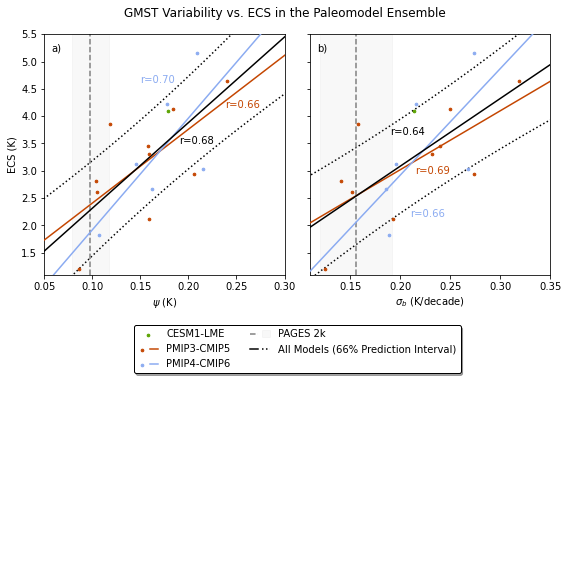

In [4]:
df = pd.read_csv('data/ec_data.csv').drop('Unnamed: 0', axis=1)

other_color = '#5BA300'
cmip5_color = '#C44601'
cmip6_color = '#8BABF1'
marker_size = 7

cox_all = df['rv_cox']
cox_other = df['rv_cox'][(df['generation']=='na') | (df['generation'] == 'CMIP3')]
cox_cmip5 = df['rv_cox'][df['generation']=='CMIP5']
cox_cmip6 = df['rv_cox'][df['generation']=='CMIP6']

nijsse_all = df['rv_nijsse']
nijsse_other = df['rv_nijsse'][(df['generation']=='na') | (df['generation'] == 'CMIP3')]
nijsse_cmip5 = df['rv_nijsse'][df['generation']=='CMIP5']
nijsse_cmip6 = df['rv_nijsse'][df['generation']=='CMIP6']

ecs_all = df['ecs']
ecs_other = df['ecs'][(df['generation']=='na') | (df['generation'] == 'CMIP3')]
ecs_cmip5 = df['ecs'][df['generation']=='CMIP5']
ecs_cmip6 = df['ecs'][df['generation']=='CMIP6']

# fig, axs = plt.subplots(1, 2, figsize = (10, 9), sharey = True)

fig, axs = plt.subplot_mosaic([[0, 1], [2, 2]],
                              layout='constrained', figsize = (8, 8), sharey=True)

plot_1 = axs[0].scatter(cox_other, ecs_other, color = other_color, s = marker_size, zorder=10)
plot_2 = axs[0].scatter(cox_cmip5, ecs_cmip5, color = cmip5_color, s = marker_size, zorder=10)
plot_3 = axs[0].scatter(cox_cmip6, ecs_cmip6, color = cmip6_color, s = marker_size, zorder=10)
axs[1].scatter(nijsse_other, ecs_other, label = 'other', color = other_color, s = marker_size, zorder=10)
axs[1].scatter(nijsse_cmip5, ecs_cmip5, label = 'CMIP5', color = cmip5_color, s = marker_size, zorder=10)
axs[1].scatter(nijsse_cmip6, ecs_cmip6, label = 'CMIP6', color = cmip6_color, s = marker_size, zorder=10)

axs[0].set_ylabel('ECS (K)')
axs[0].set_xlabel(r'$\psi$ (K)')
axs[1].set_xlabel(r'$\sigma_{b}$ (K/decade)')
axs[0].set_xlim((0.05,0.3))
axs[0].set_ylim((1.1,5.5))
axs[1].set_ylim((1.1,5.5))
axs[1].set_xlim((0.11,0.35))

# linear regression components
x = np.linspace(0, 1, 100)
slope, intercept, r, p, se = linregress(cox_cmip5, ecs_cmip5)
print('Cox CMIP5',r, intercept)
trend_2, = axs[0].plot(x, slope*x + intercept, color = cmip5_color, zorder=4)

slope, intercept, r, p, se = linregress(cox_cmip6, ecs_cmip6)
print('Cox CMIP6',r, intercept)
trend_3, = axs[0].plot(x, slope*x + intercept, color = cmip6_color, zorder=5)

slope, intercept, r, p, se = linregress(nijsse_cmip5, ecs_cmip5)
print('Sigma CMIP5',r,intercept)
axs[1].plot(x, slope*x + intercept, color = cmip5_color, zorder=4)

slope, intercept, r, p, se = linregress(nijsse_cmip6, ecs_cmip6)
print('Sigma CMIP6',r,intercept)
axs[1].plot(x, slope*x + intercept, color = cmip6_color, zorder=5)

slope, intercept, r, p, se = linregress(cox_all, ecs_all)
print('Cox All',r,slope,intercept)
trend_5, = axs[0].plot(x, slope*x + intercept, color = 'black', zorder=6)

slope, intercept, r, p, se = linregress(nijsse_all, ecs_all)
print('Sigma All',r,slope,intercept)
axs[1].plot(x, slope*x + intercept, color = 'black', zorder=6)

trend_4 = axs[0].axvline(x = 0.0981, color = 'gray', linestyle = '--')
shade_4 = axs[0].axvspan(0.0981-0.0193, 0.0981+0.0193, color = 'gray', alpha = 0.05)

axs[1].axvline(x = 0.156, color = 'gray', linestyle = '--', zorder=0)
axs[1].axvspan(0.156-0.0358, 0.156+0.0358, color = 'gray', alpha = 0.05, zorder=0)

# add in the r values
axs[0].text(x = 0.15, y = 4.6, s = 'r=0.70', color = cmip6_color)
axs[0].text(x = 0.238, y = 4.15, s = 'r=0.66', color = cmip5_color)
axs[0].text(x = 0.19, y = 3.5, s = 'r=0.68', color = 'black')

axs[1].text(x = 0.21, y = 2.15, s = 'r=0.66', color = cmip6_color)
axs[1].text(x = 0.19, y = 3.65, s = 'r=0.64', color = 'black')
axs[1].text(x = 0.215, y = 2.95, s = 'r=0.69', color = cmip5_color)

# prediction intervals
def equation(a, b):
    """Return a 1D polynomial."""
    return np.polyval(a, b) 

x = cox_all
y = ecs_all

p, cov = np.polyfit(x, y, 1, cov=True)                     # parameters and covariance from of the fit of 1-D polynom.
n = 16                                           # number of observations
m = p.size    
dof = n - m                                                # degrees of freedom
t = stats.t.ppf(0.83, n - m)                              # t-statistic; used for CI and PI bands
y_model = equation(p, x)  

# Estimates of Error in Data/Model
resid = y - y_model                                        # residuals; diff. actual data from predicted values
chi2 = np.sum((resid / y_model)**2)                        # chi-squared; estimates error in data
chi2_red = chi2 / dof                                      # reduced chi-squared; measures goodness of fit
s_err = np.sqrt(np.sum(resid**2) / dof)                    # standard deviation of the error

x2 = np.linspace(0, 1, 100)
y2 = equation(p, x2)

pi = t * s_err * np.sqrt(1 + 1/n + (x2 - np.mean(x))**2 / np.sum((x - np.mean(x))**2))   
axs[0].fill_between(x2, y2 + pi, y2 - pi, color="None", linestyle="--")
axs[0].plot(x2, y2 - pi, linestyle='dotted', color="black", label="66% Prediction Limits", zorder=-1)
axs[0].plot(x2, y2 + pi, linestyle='dotted', color="black", zorder=-1)

x = nijsse_all
y = ecs_all

p, cov = np.polyfit(x, y, 1, cov=True)                     # parameters and covariance from of the fit of 1-D polynom.
n = 16                                           # number of observations
m = p.size    
dof = n - m                                                # degrees of freedom
t = stats.t.ppf(0.83, n - m)                              # t-statistic; used for CI and PI bands
y_model = equation(p, x)  

# Estimates of Error in Data/Model
resid = y - y_model                                        # residuals; diff. actual data from predicted values
chi2 = np.sum((resid / y_model)**2)                        # chi-squared; estimates error in data
chi2_red = chi2 / dof                                      # reduced chi-squared; measures goodness of fit
s_err = np.sqrt(np.sum(resid**2) / dof)                    # standard deviation of the error

x2 = np.linspace(0, 1, 100)
y2 = equation(p, x2)

pi = t * s_err * np.sqrt(1 + 1/n + (x2 - np.mean(x))**2 / np.sum((x - np.mean(x))**2))   
axs[1].fill_between(x2, y2 + pi, y2 - pi, color="None", linestyle="--")
trend_6, = axs[1].plot(x2, y2 - pi, linestyle='dotted', zorder=-1, color="black", label="66% Prediction Limits")
axs[1].plot(x2, y2 + pi, linestyle='dotted', zorder=-1, color="black")

fig.suptitle('GMST Variability vs. ECS in the Paleomodel Ensemble')

axs[0].annotate(xy=(0.03,0.93), text='a)', xycoords='axes fraction')
axs[1].annotate(xy=(0.03,0.93), text='b)', xycoords='axes fraction')

axs[2].legend([plot_1, (plot_2, trend_2), (plot_3, trend_3), (trend_4, shade_4), (trend_5, trend_6)], ['CESM1-LME', 'PMIP3-CMIP5', 'PMIP4-CMIP6', 'PAGES 2k', 'All Models (66% Prediction Interval)'],
              handler_map = {tuple : HandlerTuple(None)}, framealpha=1, edgecolor='black', loc = 'upper center', shadow=True, ncol=2)

plt.axis('off')

plt.tight_layout()
plt.savefig('figures/figure_3.png', dpi=3000, facecolor='w')

In [31]:
print(np.mean(cox_all), np.std(cox_all, ddof=1))
print(np.mean(nijsse_all), np.std(nijsse_all, ddof=1))
print(np.mean(ecs_all), np.std(ecs_all, ddof=1))

0.15956658459747128 0.04446179055249874
0.21321448745557162 0.053539093716924314
3.2476470588235293 1.0317190109943013


# Figure 4

## Measured GMST Variability (PAGES 2k)

* Cox Metric ($\psi$): 0.0983K, 0.0184K

* Cox Metric ($\psi$): 0.0981K, 0.0193K (w/ volcano removal)

* Nijsse Metric ($\sigma_{b}$): 0.156K, 0.0359K

* Nijsse Metric ($\sigma_{b}$): 0.156K, 0.0358K (w/ volcano removal)

3.2476470588235293


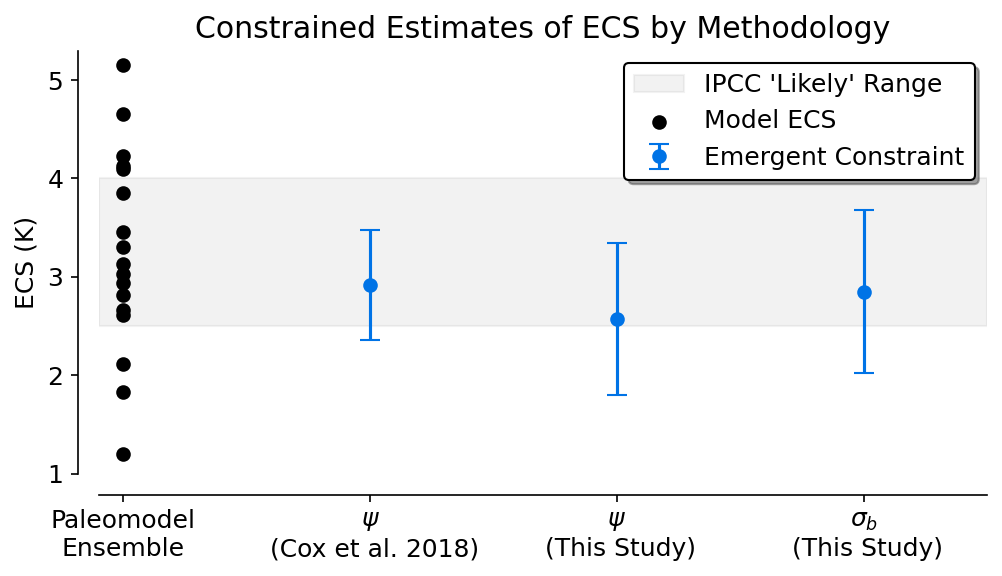

In [32]:
# define colors
constraint_color = '#0073E6'
ecs = pd.read_csv('data/ecs.csv')['ecs'].values

fig, ax = plt.subplots(figsize = (7, 4))
ax.set_ylim(1, 5.3)
ax.axhspan(2.5, 4.0, color = 'gray', alpha = 0.1, label = 'IPCC \'Likely\' Range')
ax.scatter(np.zeros(len(ecs)), ecs, color = 'black', label = 'Model ECS')
print(np.mean(ecs))
eb1 = ax.errorbar(1, y = 2.92, yerr = 0.56, capsize = 5, fmt = 'o', color = constraint_color, label = 'Emergent Constraint')
eb2 = ax.errorbar(2, y = 2.57, yerr = 0.77, capsize = 5, fmt = 'o', color = constraint_color)
eb3 = ax.errorbar(3, y = 2.85, yerr = 0.83, capsize = 5, fmt = 'o', color = constraint_color)
ax.set_xlim(-0.1, 3.5)
ax.set_xticks([0, 1, 2, 3,])
ax.set_xticklabels(['Paleomodel\nEnsemble', r'$\psi$'+'\n (Cox et al. 2018)', r'$\psi$'+'\n (This Study)', r'$\sigma_{b}$'+'\n (This Study)'])
ax.legend(framealpha=1, edgecolor='black', shadow=True)
ax.set_title('Constrained Estimates of ECS by Methodology')
ax.set_ylabel('ECS (K)')

# Move left and bottom spines outward by 10 points
ax.spines.left.set_position(('outward', 10))
ax.spines.bottom.set_position(('outward', 10))
# Hide the right and top spines
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.tight_layout()
plt.savefig('figures/figure_4.png', dpi=3000, facecolor='w')